In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

from plotnine import *
%matplotlib inline


#  데이터 불러오기

In [3]:
data = pd.read_csv('data/apt_price/주택도시보증공사_전국 평균 분양가격(2019년 11월).csv',
                  encoding='euc-kr', engine='python')

# 데이터 정보확인

In [4]:
data.head()

,지역명,규모구분,연도,월,분양가격(㎡)
0,서울,전체,2015,10,5841
1,서울,전용면적 60㎡이하,2015,10,5652
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721
4,서울,전용면적 102㎡초과,2015,10,5879


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 5 columns):
지역명        4250 non-null object
규모구분       4250 non-null object
연도         4250 non-null int64
월          4250 non-null int64
분양가격(㎡)    3982 non-null object
dtypes: int64(2), object(3)
memory usage: 166.1+ KB


In [6]:
data.isnull().sum()

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    268
dtype: int64

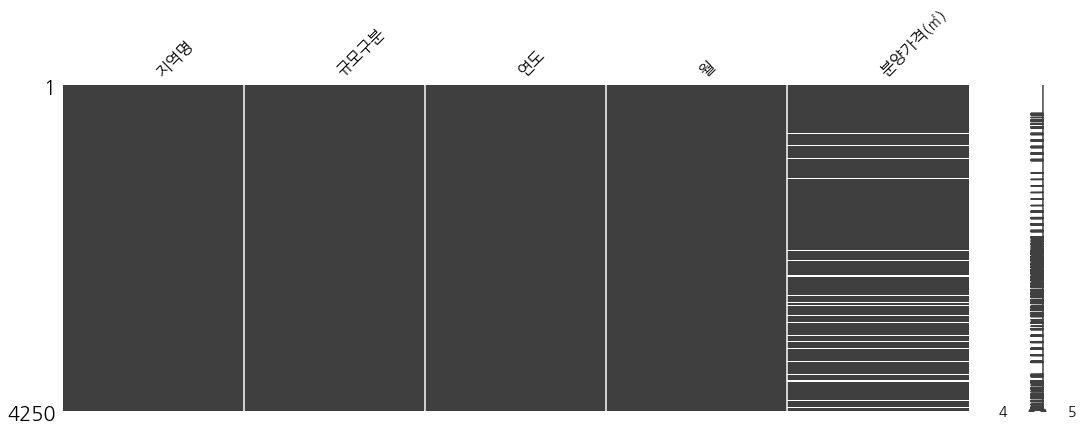

In [8]:
import missingno as msno
plt.rc('font', family='NanumGothic') 

msno.matrix(data, figsize=(18,6))

In [9]:
data['규모구분'].value_counts()

전체                   850
전용면적 60㎡이하           850
전용면적 102㎡초과          850
전용면적 60㎡초과 85㎡이하     850
전용면적 85㎡초과 102㎡이하    850
Name: 규모구분, dtype: int64

In [10]:
data['지역명'].value_counts()

서울    250
대구    250
경북    250
전북    250
세종    250
광주    250
강원    250
충남    250
전남    250
울산    250
충북    250
제주    250
경남    250
부산    250
경기    250
인천    250
대전    250
Name: 지역명, dtype: int64

* 규모구분 별 및 지역별 데이터의 개수는 각각 동일하다.

In [11]:
data['연도'].value_counts()

2018    1020
2017    1020
2016    1020
2019     935
2015     255
Name: 연도, dtype: int64

# 데이터 전처리

* 스트링 형태로 변경

In [12]:
data['연도'] = data['연도'].astype(str)
data['월'] = data['월'].astype(str)

* 분양가격을 숫자타입으로 변경

In [13]:
sale_price = data['분양가격(㎡)']
sale_price.head()

0    5841
1    5652
2    5882
3    5721
4    5879
Name: 분양가격(㎡), dtype: object

In [14]:
data['분양가격'] = pd.to_numeric(sale_price, errors='coerce')

In [15]:
# 평당 분양가격
data['평당분양가격'] = data['분양가격'] * 3.3

In [16]:
# 분양가격과 평당분양가격이 숫자타입으로 변경됨을 확인할 수 있다.
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 7 columns):
지역명        4250 non-null object
규모구분       4250 non-null object
연도         4250 non-null object
월          4250 non-null object
분양가격(㎡)    3982 non-null object
분양가격       3881 non-null float64
평당분양가격     3881 non-null float64
dtypes: float64(2), object(5)
memory usage: 232.5+ KB


## 전국 평균 분양가격

In [17]:
pd.options.display.float_format = '{:,.0f}'.format
data.groupby(data.연도). describe().T

연도             2015   2016   2017   2018   2019
분양가격   count    243    984    899    919    836
       mean   2,789  2,934  3,140  3,327  3,681
       std      977  1,071  1,108  1,186  1,551
       min    1,868  1,900  1,976  2,076  2,124
       25%    2,225  2,282  2,365  2,525  2,634
       50%    2,516  2,672  2,849  2,952  3,395
       75%    3,026  3,148  3,456  3,698  4,066
       max    7,092  8,096  7,887  8,098 12,728
평당분양가격 count    243    984    899    919    836
       mean   9,203  9,683 10,360 10,979 12,149
       std    3,224  3,536  3,655  3,914  5,117
       min    6,164  6,270  6,521  6,851  7,009
       25%    7,342  7,531  7,804  8,332  8,692
       50%    8,303  8,818  9,402  9,742 11,204
       75%    9,984 10,390 11,405 12,203 13,418
       max   23,404 26,717 26,027 26,723 42,002

## 지역별 평균 분양가격

In [17]:
data.groupby(data.지역명).describe().T

지역명              강원     경기     경남     경북     광주     대구     대전     부산     서울  \
분양가격   count    237    245    243    236    197    237    194    245    245   
       mean   2,380  4,030  2,805  2,531  2,996  3,612  3,093  3,655  7,110   
       std      303    588    413    251    439    602    677    438  1,150   
       min    2,012  3,079  2,200  2,106  2,251  2,503  2,425  2,930  5,061   
       25%    2,171  3,552  2,494  2,337  2,743  3,147  2,600  3,243  6,458   
       50%    2,292  3,952  2,784  2,525  2,881  3,585  2,834  3,737  6,806   
       75%    2,496  4,411  2,937  2,667  3,273  4,019  3,469  3,931  7,495   
       max    3,598  5,670  4,303  3,457  4,881  5,158  4,877  4,623 12,728   
평당분양가격 count    237    245    243    236    197    237    194    245    245   
       mean   7,856 13,300  9,256  8,352  9,887 11,919 10,206 12,061 23,463   
       std    1,001  1,940  1,362    829  1,448  1,988  2,235  1,445  3,796   
       min    6,640 10,161  7,260  6,950  7,428  8,260  8,002  9,669 16,701   
       25%    7,164 11,722  8,232  7,712  9,052 10,385  8,580 10,702 21,311   
       50%    7,564 13,042  9,187  8,332  9,507 11,830  9,352 12,332 22,460   
       75%    8,237 14,556  9,692  8,801 10,801 13,263 11,449 12,972 24,734   
       max   11,873 18,711 14,200 11,408 16,107 17,021 16,094 15,256 42,002   

지역명              세종     울산     인천     전남     전북     제주     충남    충북  
분양가격   count    233    146    241    244    243    216    234   245  
       mean   2,958  3,031  3,600  2,287  2,336  3,401  2,490 2,311  
       std      324    273    495    230    263    716    221   243  
       min    2,572  2,422  2,890  1,906  1,900  2,225  2,099 1,868  
       25%    2,698  2,874  3,275  2,151  2,194  2,994  2,296 2,105  
       50%    2,787  3,062  3,440  2,291  2,321  3,238  2,458 2,277  
       75%    3,147  3,174  3,773  2,390  2,478  3,804  2,652 2,500  
       max    3,931  3,594  5,188  3,053  3,052  5,462  3,201 2,855  
평당분양가격 count    233    146    241    244    243    216    234   245  
       mean   9,762 10,002 11,879  7,548  7,708 11,224  8,216 7,628  
       std    1,070    902  1,633    760    868  2,362    728   801  
       min    8,488  7,993  9,537  6,290  6,270  7,342  6,927 6,164  
       25%    8,903  9,484 10,808  7,098  7,242  9,880  7,576 6,946  
       50%    9,197 10,103 11,352  7,560  7,659 10,684  8,111 7,514  
       75%   10,385 10,474 12,451  7,889  8,177 12,553  8,752 8,250  
       max   12,972 11,860 17,120 10,075 10,072 18,025 10,563 9,422

## 규모별 평균 분양가격

In [18]:
# data.pivot_table(values, index, columns)
data.pivot_table('평당분양가격','규모구분', '연도')

연도,2015,2016,2017,2018,2019
규모구분,,,,,
전용면적 102㎡초과,"9,837","10,389","11,334","11,446","13,288"
전용면적 60㎡이하,"8,952","9,399","10,246","10,844","11,480"
전용면적 60㎡초과 85㎡이하,"8,892","9,296","9,825","10,651","11,662"
전용면적 85㎡초과 102㎡이하,"9,519","10,122","10,540","11,442","12,865"
전체,"8,893","9,293","9,901","10,676","11,580"


## 전국 분양가 변동금액

* 규모구분이 전체로 되어있는 금액으로 연도별 변동금액

In [19]:
region_year_all = data.loc[data['규모구분'] == '전체']
region_year = region_year_all.pivot_table('평당분양가격', '지역명', '연도').reset_index()
region_year

연도,지역명,2015,2016,2017,2018,2019
0,강원,"7,160","7,011","7,127","7,681","8,129"
1,경기,"10,377","11,220","11,850","13,186","14,436"
2,경남,"7,586","7,848","8,120","9,019","9,849"
3,경북,"7,171","7,361","7,795","8,505","8,788"
4,광주,"8,052","8,899","9,464","9,856","11,747"
5,대구,"9,232","10,310","11,456","12,076","13,800"
6,대전,"8,098","8,502","9,045","10,180","11,759"
7,부산,"10,307","10,430","11,578","12,998","13,144"
8,서울,"19,725","20,663","21,376","22,889","26,120"
9,세종,"8,750","8,860","9,135","10,355","11,049"


In [20]:
region_year['변동액'] = (region_year['2019'] - region_year['2015'])
region_year

연도,지역명,2015,2016,2017,2018,2019,변동액
0,강원,"7,160","7,011","7,127","7,681","8,129",969
1,경기,"10,377","11,220","11,850","13,186","14,436","4,059"
2,경남,"7,586","7,848","8,120","9,019","9,849","2,264"
3,경북,"7,171","7,361","7,795","8,505","8,788","1,617"
4,광주,"8,052","8,899","9,464","9,856","11,747","3,695"
5,대구,"9,232","10,310","11,456","12,076","13,800","4,567"
6,대전,"8,098","8,502","9,045","10,180","11,759","3,661"
7,부산,"10,307","10,430","11,578","12,998","13,144","2,837"
8,서울,"19,725","20,663","21,376","22,889","26,120","6,395"
9,세종,"8,750","8,860","9,135","10,355","11,049","2,298"


In [21]:
max_price = np.max(region_year['변동액']) * 1000
min_price = np.min(region_year['변동액']) * 1000
mean_price = np.mean(region_year['변동액']) * 1000

print('2015년부터 2019년까지 분양가는 울산을 제외한 모든 지역에서 계속 상승했다.')
print(f'상승액이 가장 큰 지역은 서울이며 상승액은 평당 {max_price:,.0f}원이다.')
print(f'상승액이 가장 작은 지역은 울산이며 평당 {min_price:,.0f}원으로, 분양가가 감소했다..')
print(f'전국 평균 변동액은 평당 {mean_price:,.0f}원이다.')

2015년부터 2019년까지 분양가는 울산을 제외한 모든 지역에서 계속 상승했다.
상승액이 가장 큰 지역은 서울이며 상승액은 평당 6,394,900원이다.
상승액이 가장 작은 지역은 울산이며 평당 -147,400원으로, 분양가가 감소했다..
전국 평균 변동액은 평당 2,615,259원이다.


In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

### 연도별 변동 그래프 - seaborn

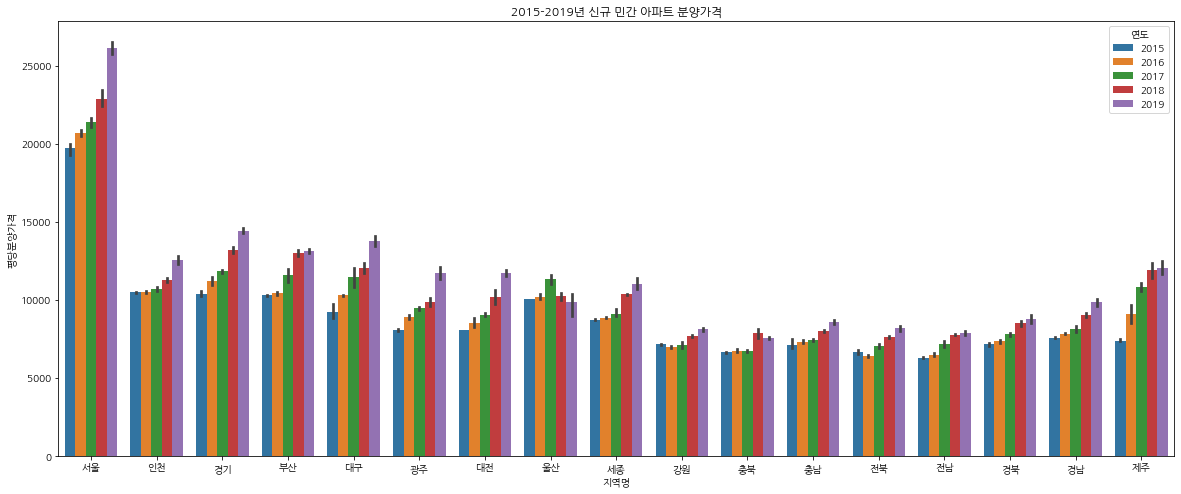

In [25]:
plt.figure(figsize=(20,8))
plt.title('2015-2019년 신규 민간 아파트 분양가격')

sns.barplot(data = region_year_all, x='지역명', y = '평당분양가격', hue='연도')

### 연도별 변동 그래프 - pandas

* pandas로 시각화 하기 위한 데이터 변형

In [27]:
df_year_region = pd.pivot_table(region_year_all,
                              index = ['지역명'], columns = '연도', values = '평당분양가격')

df_year_region.head()

연도,2015,2016,2017,2018,2019
지역명,,,,,
강원,"7,160","7,011","7,127","7,681","8,129"
경기,"10,377","11,220","11,850","13,186","14,436"
경남,"7,586","7,848","8,120","9,019","9,849"
경북,"7,171","7,361","7,795","8,505","8,788"
광주,"8,052","8,899","9,464","9,856","11,747"


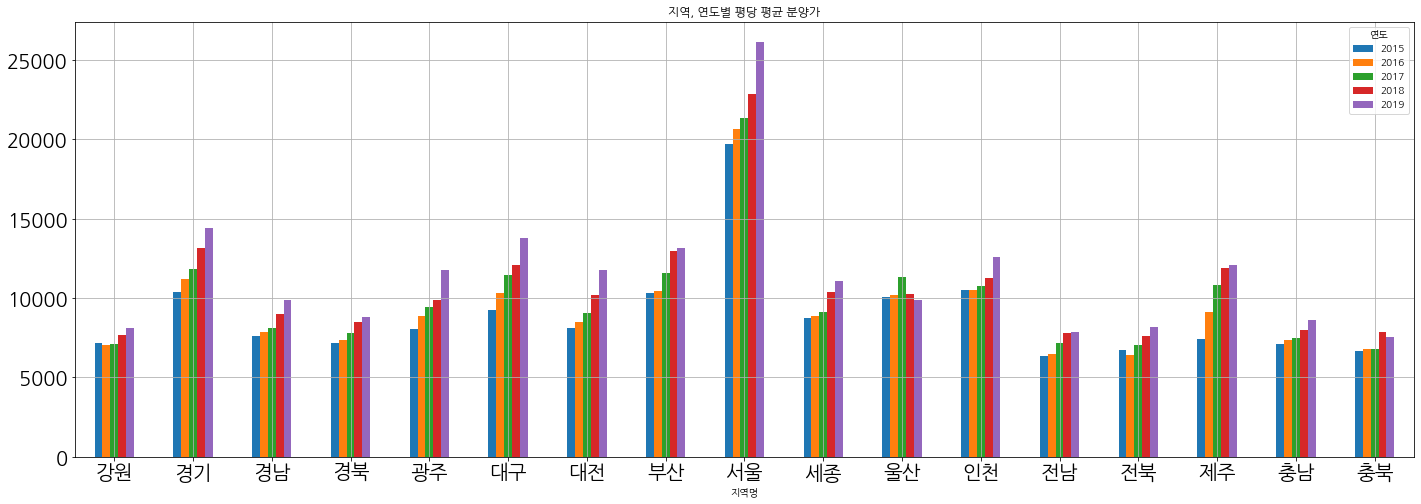

In [28]:
df_year_region.plot.bar(figsize=(24,8),
                       grid=True, fontsize=20, rot=0,
                       title='지역, 연도별 평당 평균 분양가')

### 규모별 변동 그래프 - seaborn

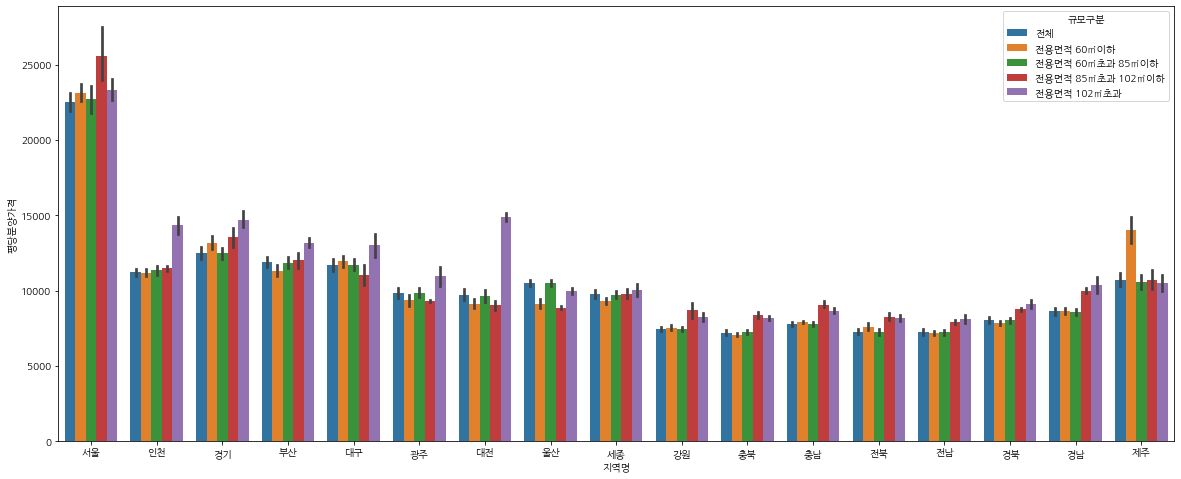

In [29]:
plt.figure(figsize=(20,8))

sns.barplot(data=data, x = '지역명', y = '평당분양가격', hue='규모구분')

* 서울의 전용면적 85㎡초과 102㎡이하의 경우 다른 규모에 비해 값이 크고 편차가 있다
* 대전의 전용면적 102㎡초과의 경우 다른 규모에 비해 값이 크다
* 제주의 전용면적 60㎡이하의 경우 다른 규모에 비해 값이 크다.

### 규모별 변동 그래프 - pandas

In [31]:
size_sale = data.loc[data['규모구분'] != '전체']
size_sale.head()

,지역명,규모구분,연도,월,분양가격(㎡),분양가격,평당분양가격
1,서울,전용면적 60㎡이하,2015,10,5652,"5,652","18,652"
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882,"5,882","19,411"
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721,"5,721","18,879"
4,서울,전용면적 102㎡초과,2015,10,5879,"5,879","19,401"
6,인천,전용면적 60㎡이하,2015,10,3488,"3,488","11,510"


In [28]:
df_size_region = pd.pivot_table(size_region,
                               index=['지역명'], columns='규모구분', values='평당분양가격')
df_size_region

규모구분,전용면적 102㎡초과,전용면적 60㎡이하,전용면적 60㎡초과 85㎡이하,전용면적 85㎡초과 102㎡이하
지역명,,,,
강원,"8,239","7,549","7,471","8,695"
경기,"14,724","13,190","12,483","13,591"
경남,"10,358","8,679","8,588","10,003"
경북,"9,111","7,870","8,031","8,778"
광주,"10,953","9,351","9,854","9,296"
대구,"13,009","11,946","11,725","11,057"
대전,"14,878","9,119","9,669","9,037"
부산,"13,187","11,336","11,844","12,023"
서울,"23,319","23,140","22,702","25,616"


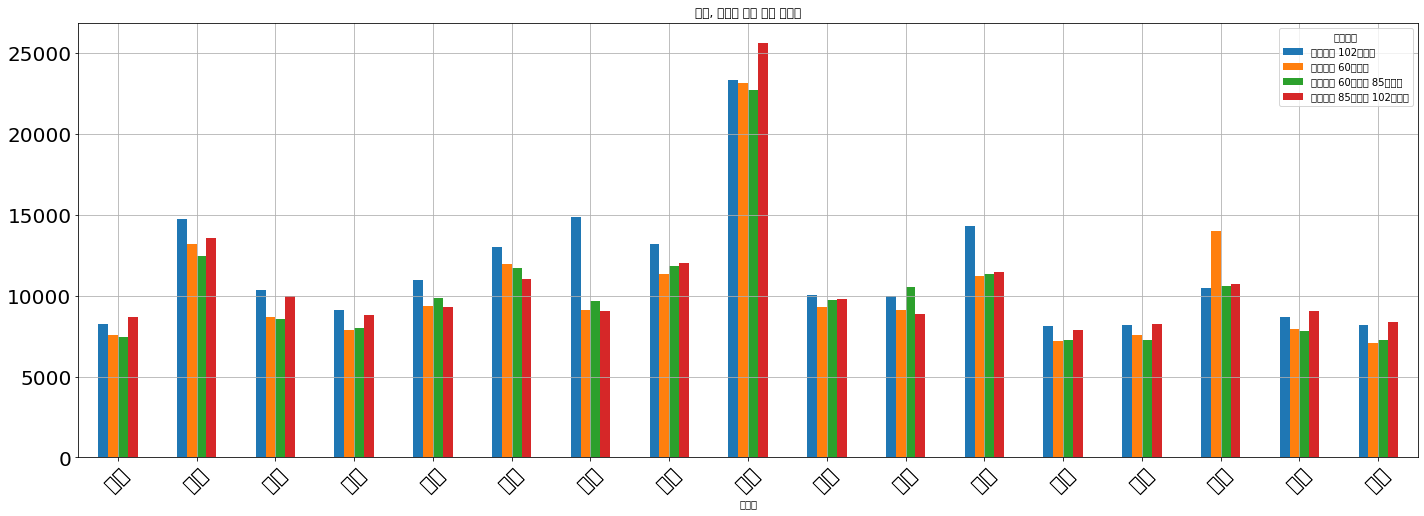

In [29]:
df_size_region.plot.bar(figsize=(24,8),
                       grid=True, fontsize=20, rot=45,
                       title='규모, 지역별 평당 평균 분양가')